IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
sns.set(style = "whitegrid")
import pickle
# for plotting graph in jupyter cell
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

READ

In [2]:
df = pd.read_csv('/Users/mac/Downloads/AIML Dataset.csv')
#df.describe()
df.head()
#df.isnull().sum() #---null check

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


EDA AND DATA SCIENCE

In [3]:
#all count of types with isFraud both 0 and 1

fraud_type_df = fraud_type.reset_index(name='count')

fraud_type_df

NameError: name 'fraud_type' is not defined

In [4]:
# Actual Frauds (ie, isFraud = 1)
isFraud_positive = df[df["isFraud"] == 1].groupby("type").size()

isFraud_positive_df = isFraud_positive.reset_index(name = "count")

isFraud_positive_df


,type,count
0,CASH_OUT,4116
1,TRANSFER,4097


<Figure size 500x300 with 0 Axes>

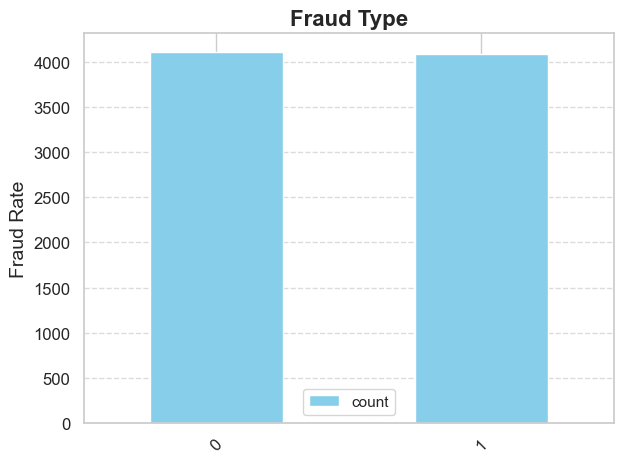

In [5]:
# Visual
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(5, 3), facecolor='none')
isFraud_positive_df.plot(kind="bar", color='skyblue')

plt.title("Fraud Type", fontsize=16, fontweight='bold')
plt.ylabel("Fraud Rate", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
#check for null
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.shape

(6362620, 11)

In [11]:
#to chehck %age of isfraud to total data
round((df["isFraud"].value_counts()[1]/df.shape[0]) * 100,2)

np.float64(0.13)

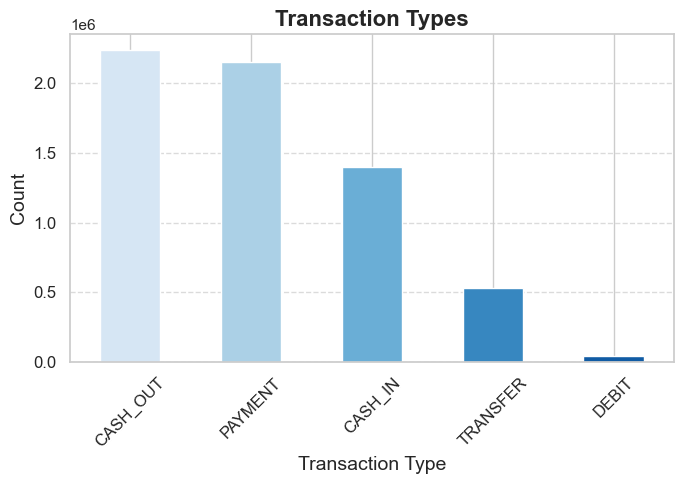

In [12]:
# Set the style using Seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(7, 5))  # Set the figure size
df["type"].value_counts().plot(kind="bar", color=sns.color_palette("Blues", n_colors=len(df["type"].unique())))

# Title and labels
plt.title("Transaction Types", fontsize=16, fontweight='bold')
plt.xlabel("Transaction Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [13]:
# Set the style using Seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(7, 5), facecolor='none')  # Set the figure size and transparent background
fraud_by_type.plot(kind="bar", color='skyblue')

# Title and labels
plt.title("Fraud Rate by Type", fontsize=16, fontweight='bold')
plt.ylabel("Fraud Rate", fontsize=14)

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


NameError: name 'fraud_by_type' is not defined

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

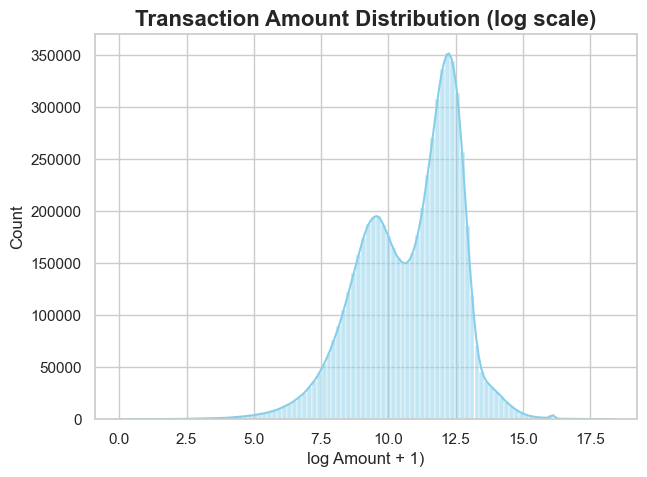

In [15]:
sns.histplot(np.log1p(df["amount"]),bins = 100, kde = True, color = "skyblue")
plt.title("Transaction Amount Distribution (log scale)", fontsize=16, fontweight='bold')
plt.xlabel("log Amount + 1)")
plt.show()

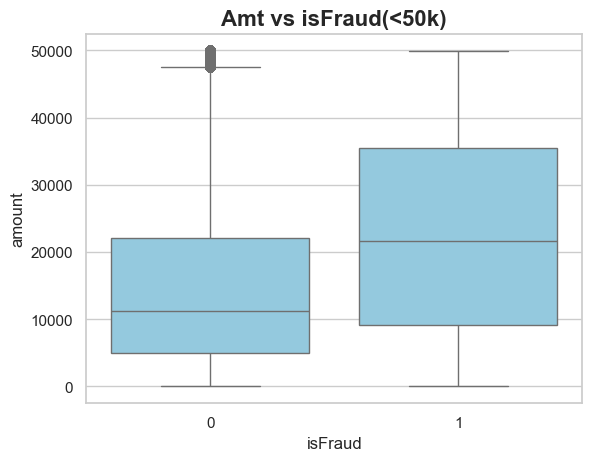

In [16]:
sns.boxplot(data = df[df["amount"] <50000], x = "isFraud", y = "amount", color = "skyblue")
plt.title("Amt vs isFraud(<50k)", fontsize=16, fontweight='bold')
plt.show()

In [17]:
df["BalanceOrigDiff"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

df["BalanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

In [18]:
(df["BalanceOrigDiff"] < 0).sum()

np.int64(1399253)

In [19]:
(df["BalanceDiffDest"] < 0).sum()

np.int64(2806464)

In [ ]:
#determine the unique steps

#df["step"].unique()

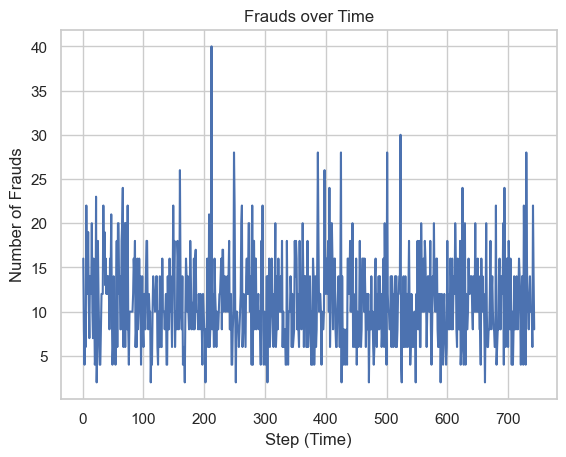

In [20]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()

plt.plot(frauds_per_step.index, frauds_per_step.values, label = "fraud_per_step")

plt.xlabel("Step (Time)")

plt.ylabel("Number of Frauds")

plt.title("Frauds over Time")

plt.grid(True)

plt.show()

In [32]:
df.drop(columns = "step", inplace = True) # from the above, WE SEE THAT TIME IS NOT NECESSARY--- step is insignificant in building the model: so its dropped

In [21]:
#to get the top senders

df["nameOrig"].value_counts().head(10)

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [22]:
#to get the top receivers

df["nameDest"].value_counts().head(10)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [23]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [24]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

fraud_types["type"].value_counts()


type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

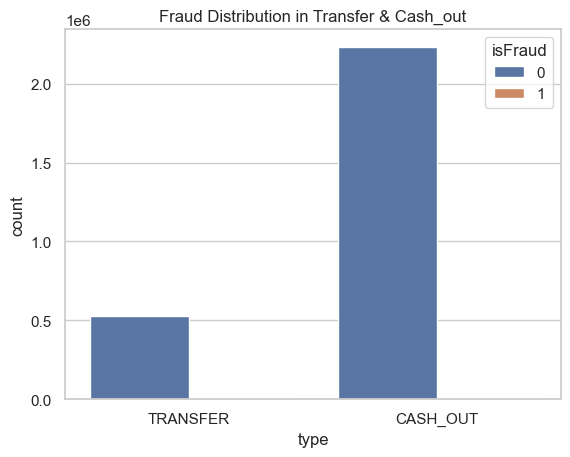

In [25]:
sns.countplot(data = fraud_types, x = "type", hue = "isFraud")
plt.title("Fraud Distribution in Transfer & Cash_out")
plt.show()

In [26]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr
corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


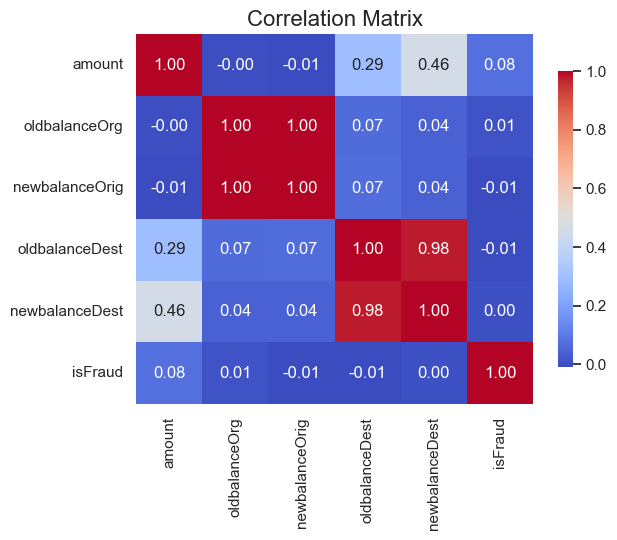

In [27]:
#Create the heatmap
sns.heatmap(
    corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={"shrink": .8},  # Adjust the color bar size
)
# Add title and adjust font size
plt.title("Correlation Matrix", fontsize=16)

# Display the plot
plt.show()

In [56]:
zero_after_transfer = df[
        (df["oldbalanceOrg"] > 0) &
        (df["newbalanceOrig"] == 0) &
        (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [29]:
len(zero_after_transfer)

1188074

In [30]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [57]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceOrigDiff,BalanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [58]:
#drop irrelevant columns for feature eng...
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1)

In [35]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,BalanceOrigDiff,BalanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


PREPROCESSING & FEATURE ENGINEERING

In [86]:
#divide into Categorical and Numeric data
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [91]:
df_model.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'BalanceOrigDiff', 'BalanceDiffDest'],
      dtype='object')

In [89]:
y = df_model["isFraud"]
x = df_model.drop("isFraud", axis =1)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify =y)

In [90]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop = "first"), categorical)
    ],
    remainder = "drop"
)

MODELING & PREDICTION

In [73]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight = "balanced", max_iter = 1000))
])

In [74]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [75]:
y_pred = pipeline.predict(x_test)

#y_pred

TEST

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [77]:
confusion_matrix(y_test, y_pred)

array([[1802666,  103656],
       [    138,    2326]])

In [78]:
# pipeline = pipeline.score(x_test, y_test)*100

# print(f"{pipeline}%")

# Evaluate but don't overwrite the pipeline
accuracy = pipeline.score(x_test, y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Save the trained model
import joblib
joblib.dump(pipeline, "sample_fraud_detection_pipeline.pkl")


Accuracy: 94.56%


['sample_fraud_detection_pipeline.pkl']

PKL For STREAMLIT

In [79]:
print(type(pipeline))
print(hasattr(pipeline, "predict"))


<class 'sklearn.pipeline.Pipeline'>
True


In [85]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'BalanceOrigDiff', 'BalanceDiffDest'],
      dtype='object')

In [92]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,BalanceOrigDiff,BalanceDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,181.00,21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,11668.14,0.00
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,339682.13,-339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,850002.52,0.00
